### Discovering new classes with active learning

Active learning methods select samples for which to obtain labels to improve the classifier as much as possible with the smallest burden on the human oracles answering queries. For instance, if we have two classes, established by some training data, the samples on the boundaries of those two classes are very informative. If we get labels for these boundary samples, the classifier can be improved.

Often times we do not have training data for some or all of the classes. With the ActiveClassDiscovery tool, a prescribed amount of queries can be acquired to find new classes. Queries are generated sequentially, and account for the queries which have already been made. This is accomplished using an underlying hierarchical clustering of the data. We identify the largest groups of samples without a label amongst them, and select queries from these groups.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from scipy.spatial.distance import pdist

from robustclust import get_constraints, plot_constraints

Make some data. Select the number of queries we can ask of a human.

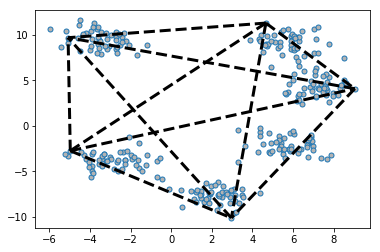

In [18]:
N, num_clusters, num_query = (300, 6, 10)

data, labels = ds.make_blobs(
    n_samples=N, 
    n_features=2, 
    centers=num_clusters)

constraint_mat, _ = get_constraints(
    labels, 
    pdist(data), 
    method='ffqs', 
    num_constraints=num_query, 
    err_rate=0)

plot_constraints(data, constraint_mat)
plt.show()

Use the ActiveClassDiscovery class to sequentially generate samples for query which will help find new classes.

In [3]:
# acd = ACD(data)

# trainInd = np.zeros(Nquery).astype(int)
# for i in range(Nquery):
#     trainInd[i] = acd.get_query()
    
# plt.figure()
# cc.plot_labels(data)
# cc.plot_labels(data[trainInd], labels[trainInd])
# plt.show()     

All of the classes have been captured with the generated queries. The queries did NOT rely on the results of the human feedback. Thus, this is a batch method and does not require real-time communication with the human oracle.